In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib.ticker import AutoMinorLocator
import pandas as pd
import tkinter as tk
from tkinter import filedialog

## **Optional** Latex and graphic settings, requires local Latex installation.

In [2]:
# Enable LaTeX and configure the font to use sans-serif (e.g., Helvetica)
rc('text', usetex=True)
rcParams['text.latex.preamble'] = r'\usepackage{helvet} \renewcommand{\familydefault}{\sfdefault} \usepackage{sansmath} \sansmath \usepackage{upgreek}'
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 16
rcParams['axes.linewidth'] = 1.1
rcParams['axes.labelpad'] = 10.0
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams.update({
    "figure.figsize": (7, 6),
    "figure.subplot.left": 0.177, "figure.subplot.right": 0.946,
    "figure.subplot.bottom": 0.156, "figure.subplot.top": 0.965,
    "axes.autolimit_mode": "round_numbers",
    "xtick.major.size": 7,
    "xtick.minor.size": 3.5,
    "xtick.major.width": 1.1,
    "xtick.minor.width": 1.1,
    "xtick.major.pad": 15,
    "xtick.minor.visible": True,
    "ytick.major.size": 7,
    "ytick.minor.size": 3.5,
    "ytick.major.width": 1.1,
    "ytick.minor.width": 1.1,
    "ytick.major.pad": 10,
    "ytick.minor.visible": True,
    "lines.linewidth": 2,
    "xtick.direction": "in",
    "ytick.direction": "in"
})

## Module for plotting "chromatograms" generated from the SEC_SAXS file

In [37]:

# Create a pop-up window to select a file
root = tk.Tk()
root.withdraw()  # Hide the root window
# Bring the window to the front
root.lift()
root.attributes('-topmost', True)
root.after_idle(lambda: root.attributes('-topmost', False))

file_paths = filedialog.askopenfilenames(title = "Select data file", filetypes=[(".dat", "*.dat"), ("All files", "*.*")])

In [38]:
df = {}
for file_path in file_paths:
    df[file_path] = pd.read_csv(file_path, sep= r'\s+', header=None, skiprows=1, engine='python')

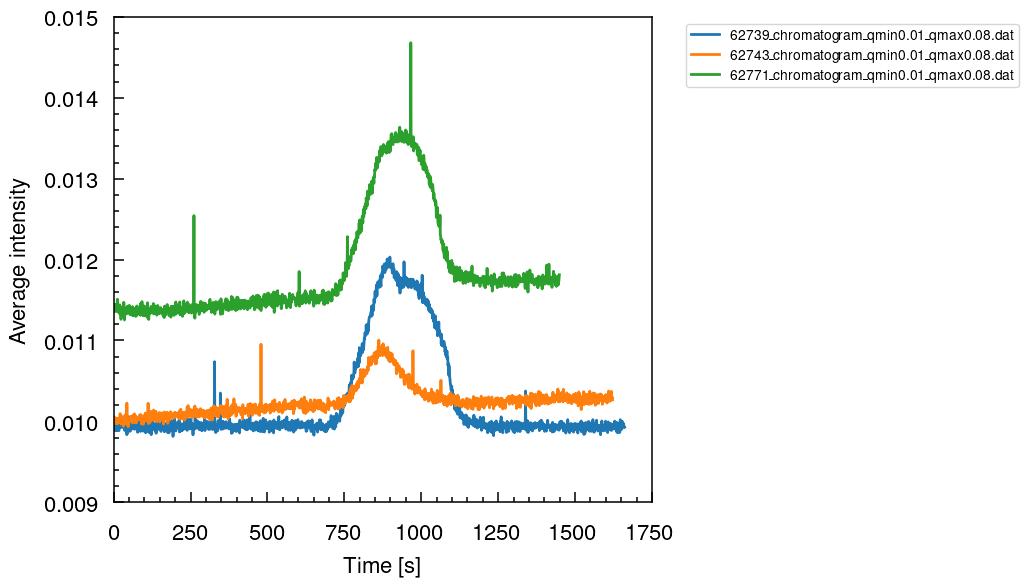

In [ ]:
plt.figure()

for file_path, data in df.items():
    time = data.iloc[:,0]
    intensity = data.iloc[:,1]
    plt.plot(time, intensity, label=file_path.split('/')[-1])  # Plot with filename as label

plt.xlabel('Time (s)')
plt.ylabel('Average intensity')
plt.yscale('linear')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.show()